### Linear Regression

In [ ]:
# 필요한 라이브러리 호출
import torch
import torch.nn.functional as F
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# csv 파일 불러오기
df = pd.read_csv('data/cars.csv', index_col='Unnamed: 0')
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [20]:
# 속력과 제동거리를 numpy array로 가져오기
x_data = df['speed'].values # series -> numpy array
y_data = df['dist'].values

In [16]:
x_data

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

In [17]:
y_data

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

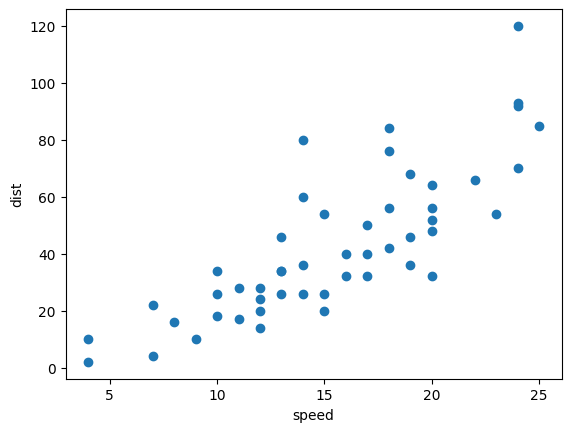

In [ ]:
# 산점도 그래프 그리기
plt.scatter(x_data, y_data)
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

In [37]:
# 텐서 노드 만들기 (벡터)
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

w = torch.empty(1, requires_grad=True)
b = torch.empty(1, requires_grad=True)

# 0~1 사이 랜덤 값으로 초기화
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.0012], requires_grad=True)

In [40]:
# lost function 정의하기 (MSE)
def cost():
    hx = w * x + b
    c = torch.mean((hx - y) ** 2)
    return c

In [44]:
# 학습 진행
optimizer = Adam([w, b], lr=0.01)

for epoch in range(2000):
    c = cost()
    optimizer.zero_grad() # 미분 초기화
    c.backward() # w, b 미분 진행
    optimizer.step() # 미분 결과 업데이트
    print(f'cost : {c.item()}')

cost : 227.0703887939453
cost : 227.10003662109375
cost : 227.0723419189453
cost : 227.07667541503906
cost : 227.0874786376953
cost : 227.08348083496094
cost : 227.0742950439453
cost : 227.07044982910156
cost : 227.0738525390625
cost : 227.07838439941406
cost : 227.07839965820312
cost : 227.0746307373047
cost : 227.07107543945312
cost : 227.07066345214844
cost : 227.07289123535156
cost : 227.07479858398438
cost : 227.07447814941406
cost : 227.07241821289062
cost : 227.0706787109375
cost : 227.07061767578125
cost : 227.07183837890625
cost : 227.07284545898438
cost : 227.0725555419922
cost : 227.07138061523438
cost : 227.07049560546875
cost : 227.07057189941406
cost : 227.07130432128906
cost : 227.07179260253906
cost : 227.07151794433594
cost : 227.07081604003906
cost : 227.07040405273438
cost : 227.07061767578125
cost : 227.07107543945312
cost : 227.0712127685547
cost : 227.0709228515625
cost : 227.0705108642578
cost : 227.0704345703125
cost : 227.07066345214844
cost : 227.0708618164062

In [53]:
# 예측 함수 정의
def hx_fn(xd):
    xd = torch.tensor(xd, dtype=torch.float32) # xd(scalar)를 tensor로 변환
    hx = w * xd + b
    return hx.detach().numpy() # 값만 추출

In [61]:
# 속력이 20인 경우 제동거리 예측하기
hx_fn(20)

array([61.07341], dtype=float32)

In [60]:
# 속력이 15, 17인 경우 제동거리 예측하기
hx_fn([15, 17])

array([41.410336, 49.275566], dtype=float32)

In [66]:
# x_data (speed) 전체에 대한 예측값 구하기
pred = hx_fn(x_data)

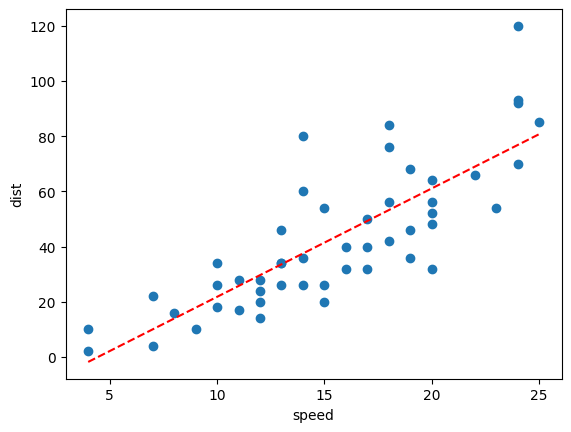

In [70]:
# 산점도와 예측 line 그리기
plt.scatter(x_data, y_data)
plt.plot(x_data, pred, 'r--')
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

### 10 Minute Quiz
1. electric.csv에서 전기 생산량이 4, 5인 경우의 전기 사용량 예측하기
2. 전체 데이터에 대한 scatter와 예측 선 그리기

In [72]:
# csv 파일 불러오기
df = pd.read_csv('data/electric.csv', index_col='Unnamed: 0')
df.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [ ]:
# 전기생산량과 전기사용량을 numpy array로 가져오기
x_data = df['전기생산량'].values
y_data = df['전기사용량'].values

In [78]:
# 텐서 노드 만들기
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

w = torch.empty(1, requires_grad=True)
b = torch.empty(1, requires_grad=True)

torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.3287], requires_grad=True)

In [79]:
# lost function 정의하기 (MSE)
def cost():
    hx = w * x + b
    c = torch.mean((hx - y) ** 2)
    return c

In [80]:
# 학습 진행 (alpha=0.01)
optimizer = Adam([w, b], lr=0.01)

for epoch in range(5000):
    c = cost()
    optimizer.zero_grad() # 미분 초기화
    c.backward() # w, b 미분 진행
    optimizer.step()
    print(f'cost : {c.item()}')

cost : 4.744776248931885
cost : 4.533182144165039
cost : 4.3265767097473145
cost : 4.12504243850708
cost : 3.928656578063965
cost : 3.73748779296875
cost : 3.551600217819214
cost : 3.3710477352142334
cost : 3.195878028869629
cost : 3.0261306762695312
cost : 2.8618357181549072
cost : 2.7030160427093506
cost : 2.5496826171875
cost : 2.4018399715423584
cost : 2.2594821453094482
cost : 2.122593402862549
cost : 1.9911493062973022
cost : 1.8651148080825806
cost : 1.7444463968276978
cost : 1.6290916204452515
cost : 1.5189868211746216
cost : 1.414061427116394
cost : 1.3142353296279907
cost : 1.2194201946258545
cost : 1.1295193433761597
cost : 1.0444294214248657
cost : 0.9640381932258606
cost : 0.888228178024292
cost : 0.8168749809265137
cost : 0.7498483657836914
cost : 0.6870133280754089
cost : 0.6282299160957336
cost : 0.5733544826507568
cost : 0.5222398638725281
cost : 0.4747360944747925
cost : 0.43069127202033997
cost : 0.3899519443511963
cost : 0.3523636758327484
cost : 0.31777170300483704

In [83]:
# 예측 함수 정의
def hx_fn(xd):
    xd = torch.tensor(xd, dtype=torch.float32)
    hx = w * xd + b
    return hx.detach().numpy()

In [88]:
# 전기생산량이 4, 5인 경우 전기사용량 예측하기
print(f'전기생산량이 4인 경우, 전기사용량 예측 : {hx_fn([4, 5])[0]}')
print(f'전기생산량이 5인 경우, 전기사용량 예측 : {hx_fn([4, 5])[1]}')

전기생산량이 4인 경우, 전기사용량 예측 : 2.901994466781616
전기생산량이 5인 경우, 전기사용량 예측 : 3.3975982666015625


In [84]:
# x_data 전체에 대한 예측값 구하기
pred = hx_fn(x_data)

In [91]:
# 한글 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

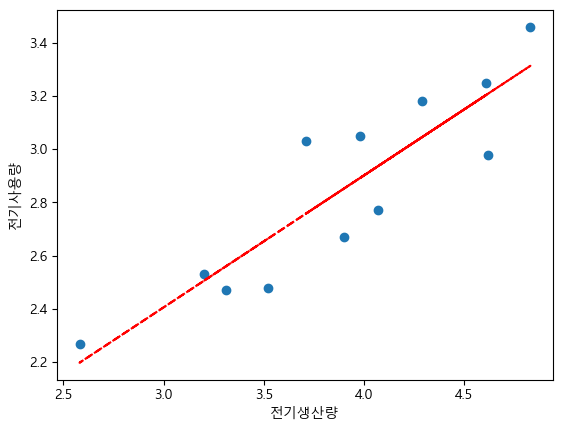

In [92]:
# 산점도 그래프 그리기
plt.scatter(x_data, y_data)
plt.plot(x_data, pred, 'r--')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.show()